In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')


The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dataset

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print("First 5 with_mask files:", with_mask_files[0:5])
print("Last 5 with_mask files:", with_mask_files[-5:])

First 5 with_mask files: ['with_mask_991.jpg', 'with_mask_631.jpg', 'with_mask_279.jpg', 'with_mask_116.jpg', 'with_mask_1418.jpg']
Last 5 with_mask files: ['with_mask_2782.jpg', 'with_mask_2012.jpg', 'with_mask_2716.jpg', 'with_mask_587.jpg', 'with_mask_151.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print("First 5 without_mask files:", without_mask_files[0:5])
print("Last 5 without_mask files:", without_mask_files[-5:])


First 5 without_mask files: ['without_mask_2475.jpg', 'without_mask_1251.jpg', 'without_mask_3021.jpg', 'without_mask_356.jpg', 'without_mask_30.jpg']
Last 5 without_mask files: ['without_mask_3019.jpg', 'without_mask_426.jpg', 'without_mask_3374.jpg', 'without_mask_3118.jpg', 'without_mask_284.jpg']


In [ ]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Lables for the two class of images

with mask->1
without mask->0

In [ ]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

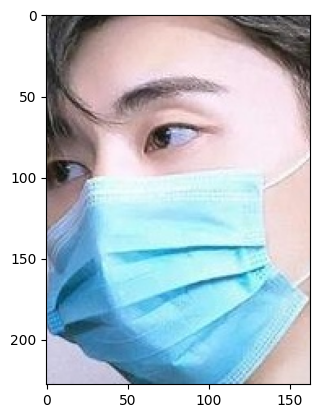

In [ ]:
#display with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot=plt.imshow(img)
plt.show()

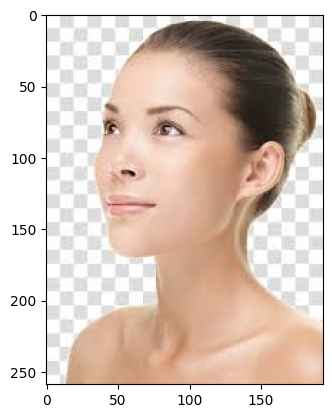

In [ ]:
#display without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing

Resize the Images
Convert the images to numpy arrays

In [ ]:
with_mask_path='/content/data/with_mask/'

data=[]
for img_file in with_mask_files:

  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  if image is not None:
    data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:

  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  if image is not None:
    data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
  type(data)

list

In [ ]:
len(data)

7553

array([[[185, 184, 189],
        [208, 208, 213],
        [225, 224, 231],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[215, 216, 224],
        [203, 205, 213],
        [205, 206, 217],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[233, 234, 244],
        [191, 192, 201],
        [155, 155, 165],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[250, 251, 254],
        [248, 249, 253],
        [247, 248, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[250, 251, 255],
        [249, 250, 254],
        [249, 250, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 250, 254],
        [248, 249, 253],
        [248, 249, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
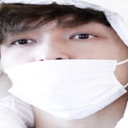

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape


(128, 128, 3)

In [ ]:
#converting image list and labels list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0


array([[[203, 215, 237],
        [203, 215, 238],
        [204, 216, 239],
        ...,
        [247, 247, 255],
        [239, 241, 250],
        [234, 237, 246]],

       [[208, 219, 244],
        [204, 216, 241],
        [196, 208, 233],
        ...,
        [249, 251, 255],
        [238, 241, 248],
        [231, 234, 243]],

       [[201, 213, 244],
        [189, 202, 232],
        [165, 178, 207],
        ...,
        [248, 251, 255],
        [242, 245, 252],
        [238, 241, 249]],

       ...,

       [[ 23,  22,  21],
        [ 22,  21,  20],
        [ 19,  19,  18],
        ...,
        [ 14,  13,   9],
        [ 14,  13,   9],
        [ 14,  13,   9]],

       [[ 23,  23,  21],
        [ 22,  22,  20],
        [ 21,  21,  19],
        ...,
        [ 14,  13,   9],
        [ 14,  13,   9],
        [ 14,  13,   9]],

       [[ 22,  22,  20],
        [ 21,  21,  19],
        [ 19,  19,  17],
        ...,
        [ 13,  12,   8],
        [ 13,  12,   8],
        [ 13,  12,   8]]], dtype=uint8)
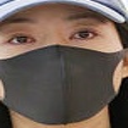

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.79607843, 0.84313725, 0.92941176],
        [0.79607843, 0.84313725, 0.93333333],
        [0.8       , 0.84705882, 0.9372549 ],
        ...,
        [0.96862745, 0.96862745, 1.        ],
        [0.9372549 , 0.94509804, 0.98039216],
        [0.91764706, 0.92941176, 0.96470588]],

       [[0.81568627, 0.85882353, 0.95686275],
        [0.8       , 0.84705882, 0.94509804],
        [0.76862745, 0.81568627, 0.91372549],
        ...,
        [0.97647059, 0.98431373, 1.        ],
        [0.93333333, 0.94509804, 0.97254902],
        [0.90588235, 0.91764706, 0.95294118]],

       [[0.78823529, 0.83529412, 0.95686275],
        [0.74117647, 0.79215686, 0.90980392],
        [0.64705882, 0.69803922, 0.81176471],
        ...,
        [0.97254902, 0.98431373, 1.        ],
        [0.94901961, 0.96078431, 0.98823529],
        [0.93333333, 0.94509804, 0.97647059]],

       ...,

       [[0.09019608, 0.08627451, 0.08235294],
        [0.08627451, 0.08235294, 0.07843137],
        [0.0745098 , 0

Building a Convolutional Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the neural networks
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
#training the neural networks
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.7575 - loss: 0.5179 - val_acc: 0.8926 - val_loss: 0.2557
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - acc: 0.8779 - loss: 0.2991 - val_acc: 0.9058 - val_loss: 0.2217
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9117 - loss: 0.2374 - val_acc: 0.9140 - val_loss: 0.1975
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9229 - loss: 0.2007 - val_acc: 0.9256 - val_loss: 0.1958
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9361 - loss: 0.1601 - val_acc: 0.9306 - val_loss: 0.2015


Model Evaluation


In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9271 - loss: 0.1781
Test Accuracy = 0.9225678443908691


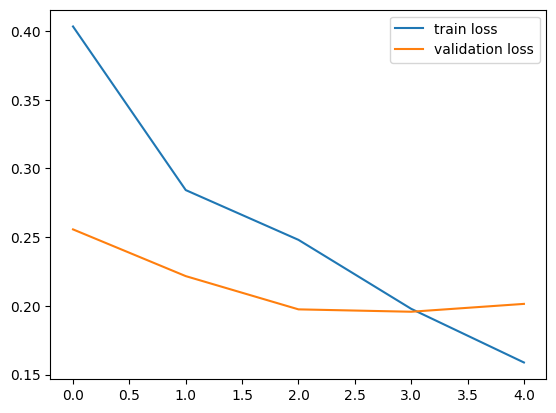

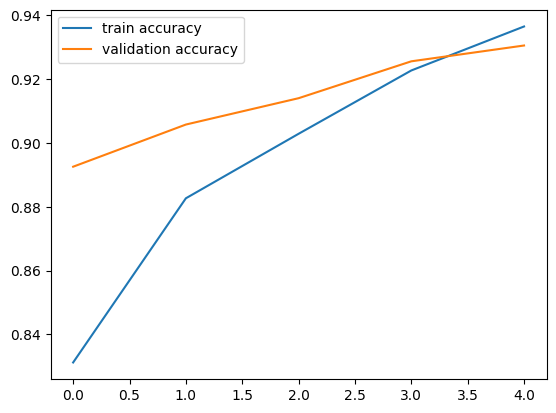

In [ ]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Enter the path of the image to be tested: /content/data/without_mask/without_mask_2925.jpg


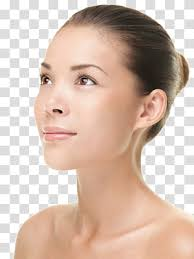

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
[[0.02769402 0.972306  ]]
1
The person in the image is not wearing a mask


In [ ]:
input_image_path=input('Enter the path of the image to be tested: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label=np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label==0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Enter the path of the image to be tested: /content/data/with_mask/with_mask_1545.jpg


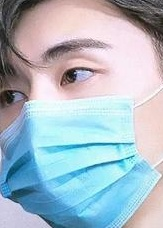

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.80006    0.19994006]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path=input('Enter the path of the image to be tested: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resize/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label=np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label==0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')